In [1]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) # 비지도(자율)이므로 label넣지 않음  ===> 성능측정이 안됨 대신 SSE값 비교

c:\users\edu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
print(f'k_means.labels_ : {k_means.labels_[::10]}') # 군집번호

k_means.labels_ : [1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]


In [3]:
print(f'y_iris[::10] : {y_iris[::10]}') # iris 붓꽃 종류

y_iris[::10] : [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]



## 그룹으로 산점도

In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 8] # setting figure size
#출처: https://rfriend.tistory.com/414 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

c:\users\edu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\edu\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
# loading 'iris' dataset from seaborn
iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



## (1) matplotlib 으로 그룹별 산점도 그리기 (scatter plot by groups via matplotlib)

In [11]:
# Scatter plot with a different color by groups
groups = iris.groupby('species')
groups

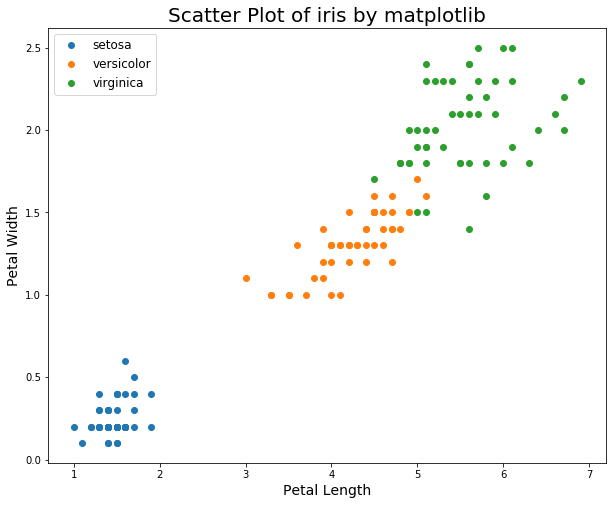

In [10]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.petal_length, 
            group.petal_width, 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('Scatter Plot of iris by matplotlib', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()


## (2) seaborn 으로 그룹별 산점도 그리기 (scatter plot by groups via seaborn)

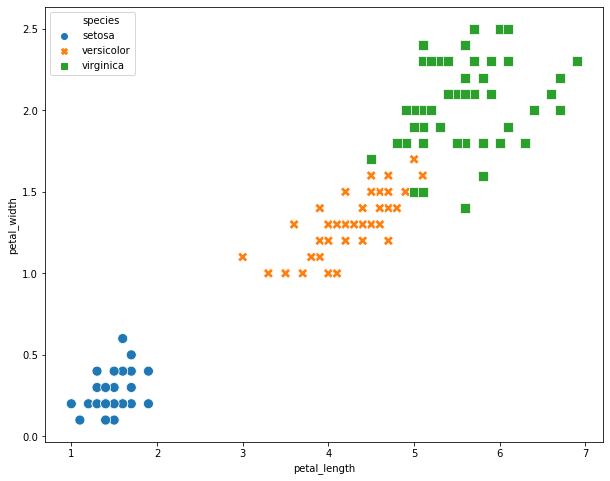

In [14]:
# Scatter plot by Groups
sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', # different colors by group
                style='species', # different shapes by group
                s=100, # marker size
                data=iris)
plt.show()


## (3) pandas로 그룹별 산점도 그리기 (scatter plot by groups via pandas)

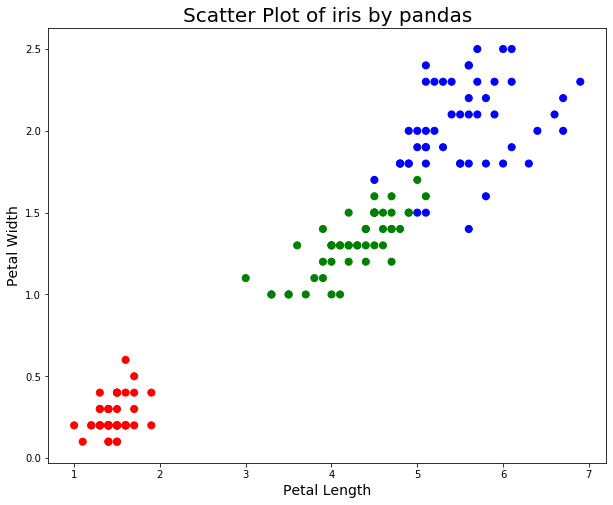

In [15]:
# adding 'color' column
iris['color'] = np.where(iris.species == 'setosa', 'red', 
                         np.where(iris.species =='versicolor', 
                         'green', 
                         'blue'))

# scatter plot
iris.plot(kind='scatter',
          x='petal_length', 
          y='petal_width', 
          s=50, # marker size
          c=iris['color']) # marker color by group
plt.title('Scatter Plot of iris by pandas', fontsize=20)
plt.xlabel('Petal Length', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.show()